In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data set about the batting figures of batsmen in ODI matches 

## Read and pre-process the data

In [62]:
df_cricket_ = pd.read_csv("../data/Cricket.csv", sep=",", encoding="ISO-8859-1", header=0)
df_cricket_.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


- Choose strike rate and average as the two factors on which you will cluster the data. 
- You don’t need to clean the data. 
- Just scale the data using the scale command and create the clusters.
- standardise all parameters using standard_scaler.fit_transform() and save the output to a variable before you proceed. 
- (check the K-Means code)
- Choose random_state=100 for running K-Means in Python with SKLearn.

In [63]:
df_cricket_2f = df_cricket_[['SR','Ave']]
df_cricket_2f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SR      79 non-null     float64
 1   Ave     79 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


In [64]:
df_cricket_2f.head()

,SR,Ave
0,86.23,44.83
1,78.86,41.98
2,80.39,42.03
3,91.20,32.36
4,78.96,33.37


### Scale the data

In [65]:
# instantiate
scaler = StandardScaler()

# fit_transform
df_cricket_scaled = scaler.fit_transform(df_cricket_2f)
print(df_cricket_scaled.shape)
df_cricket_scaled = pd.DataFrame(df_cricket_scaled)
df_cricket_scaled.columns = ['SR','Ave']
df_cricket_scaled.head()

(79, 2)


,SR,Ave
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185


## K-Means Clustering

In [66]:
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=100)
kmeans.fit(df_cricket_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=100)

In [67]:
kmeans.labels_

array([3, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 3, 2, 3, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 3, 2, 0, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 3, 1, 2, 2, 3, 2,
       2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 1, 3, 3, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2], dtype=int32)

In [68]:
df_cricket_['cluster_id'] = kmeans.labels_
df_cricket_.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2


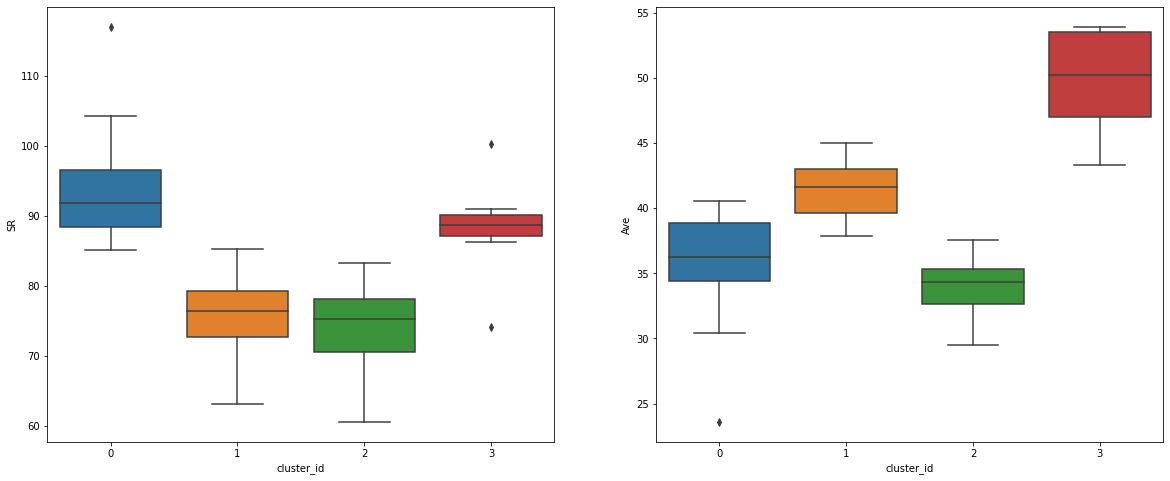

In [69]:
# plot
plt.figure(figsize=(20, 8))

ax = plt.subplot(1,2,1)
sns.boxplot(x='cluster_id', y='SR', data=df_cricket_, ax=ax)

ax = plt.subplot(1,2,2)
sns.boxplot(x='cluster_id', y='Ave', data=df_cricket_, ax=ax)

plt.show()

In [74]:
df_cricket_['Name'] = df_cricket_['Player'].apply(lambda x: x.split('(')[0][:-1])

In [76]:
df_cricket_.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id,Name
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3,SR Tendulkar
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1,KC Sangakkara
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1,RT Ponting
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0,ST Jayasuriya
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2,DPMD Jayawardene


In [82]:
df_cricket_[df_cricket_['Name']=='V Kohli']['cluster_id'].values[0]

3

In [83]:
# Group A: High SR, High Average
df_cricket_[df_cricket_['cluster_id']==3]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id,Name
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3,SR Tendulkar
13,MS Dhoni (Asia/INDIA),2004-2017,295,255,70,9496,183*,51.32,10706,88.69,10,64,8,3,MS Dhoni
15,AB de Villiers (Afr/SA),2005-2017,222,213,39,9319,162*,53.55,9295,100.25,24,53,7,3,AB de Villiers
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11,3,V Kohli
34,HM Amla (SA),2008-2017,156,153,10,7186,159,50.25,8069,89.05,25,33,3,3,HM Amla
38,MG Bevan (AUS),1994-2004,232,196,67,6912,108*,53.58,9320,74.16,6,46,5,3,MG Bevan
42,IVA Richards (WI),1975-1991,187,167,24,6721,189*,47.00,7451,90.20,11,45,7,3,IVA Richards
63,MJ Guptill (NZ),2009-2017,146,143,16,5500,237*,43.30,6269,87.73,12,32,12,3,MJ Guptill
64,MEK Hussey (AUS),2004-2012,185,157,44,5442,109*,48.15,6243,87.16,3,39,3,3,MEK Hussey


In [84]:
# Group B: Low SR, Low Average
df_cricket_[df_cricket_['cluster_id']==2]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id,Name
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2,DPMD Jayawardene
14,M Azharuddin (INDIA),1985-2000,334,308,54,9378,153*,36.92,12669,74.02,7,58,9,2,M Azharuddin
16,PA de Silva (SL),1984-2003,308,296,30,9284,145,34.90,11443,81.13,11,64,17,2,PA de Silva
22,MS Atapattu (SL),1990-2007,268,259,32,8529,132*,37.57,12594,67.72,11,59,13,2,MS Atapattu
26,HH Gibbs (SA),1996-2010,248,240,16,8094,175,36.13,9721,83.26,21,37,22,2,HH Gibbs
28,SP Fleming (ICC/NZ),1994-2007,280,269,21,8037,134*,32.40,11242,71.49,8,49,17,2,SP Fleming
30,SR Waugh (AUS),1986-2002,325,288,58,7569,120*,32.90,9971,75.91,3,45,15,2,SR Waugh
31,A Ranatunga (SL),1982-1999,269,255,47,7456,131*,35.84,9571,77.90,4,49,18,2,A Ranatunga
33,Younis Khan (PAK),2000-2015,265,255,23,7249,144,31.24,9628,75.29,7,48,22,2,Younis Khan
35,Saleem Malik (PAK),1982-1999,283,256,38,7170,102,32.88,9383,76.41,5,47,19,2,Saleem Malik


In [85]:
# Group C: High SR, Low Average
df_cricket_[df_cricket_['cluster_id']==0]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id,Name
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0,ST Jayasuriya
10,TM Dilshan (SL),1999-2016,330,303,41,10290,161*,39.27,11933,86.23,22,47,11,0,TM Dilshan
12,AC Gilchrist (AUS/ICC),1996-2008,287,279,11,9619,172,35.89,9922,96.94,16,55,19,0,AC Gilchrist
17,CH Gayle (ICC/WI),1999-2015,269,264,17,9221,215,37.33,10834,85.11,22,47,23,0,CH Gayle
20,Yuvraj Singh (Asia/INDIA),2000-2017,304,278,40,8701,150,36.55,9924,87.67,14,52,18,0,Yuvraj Singh
24,V Sehwag (Asia/ICC/INDIA),1999-2013,251,245,9,8273,219,35.05,7929,104.33,15,38,14,0,V Sehwag
27,Shahid Afridi (Asia/ICC/PAK),1996-2015,398,369,27,8064,124,23.57,6892,117.00,6,39,30,0,Shahid Afridi
50,BB McCullum (NZ),2002-2016,260,228,28,6083,166,30.41,6312,96.37,5,32,20,0,BB McCullum
57,EJG Morgan (ENG/IRE),2006-2017,185,174,25,5772,124*,38.73,6513,88.62,11,34,12,0,EJG Morgan
59,SR Watson (AUS),2002-2015,190,169,27,5757,185*,40.54,6365,90.44,9,33,12,0,SR Watson


In [87]:
# Group D: Low SR, High Average
df_cricket_[df_cricket_['cluster_id']==1]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id,Name
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1,KC Sangakkara
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1,RT Ponting
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,1,Inzamam-ul-Haq
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,1,JH Kallis
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16,1,SC Ganguly
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,1,R Dravid
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16,1,BC Lara
11,Mohammad Yousuf (Asia/PAK),1998-2010,288,273,40,9720,141*,41.71,12942,75.10,15,64,15,1,Mohammad Yousuf
18,Saeed Anwar (PAK),1989-2003,247,244,19,8824,194,39.21,10938,80.67,20,43,15,1,Saeed Anwar
19,S Chanderpaul (WI),1994-2011,268,251,40,8778,150,41.60,12408,70.74,11,59,6,1,S Chanderpaul


<AxesSubplot:xlabel='SR', ylabel='Ave'>

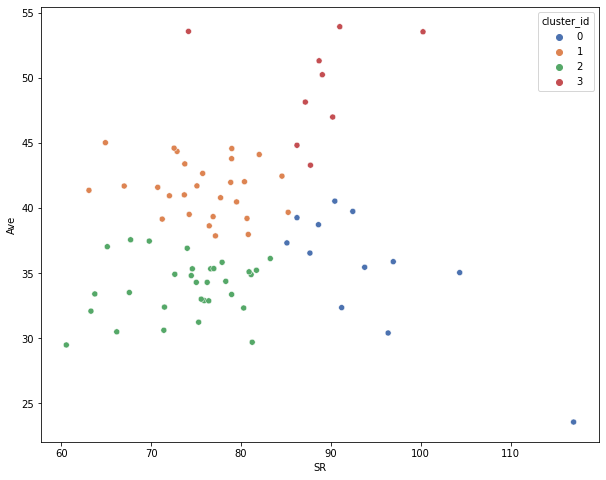

In [93]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='SR', y='Ave', data=df_cricket_,hue='cluster_id', palette='deep')

## Hierarchial Clustering

In [95]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

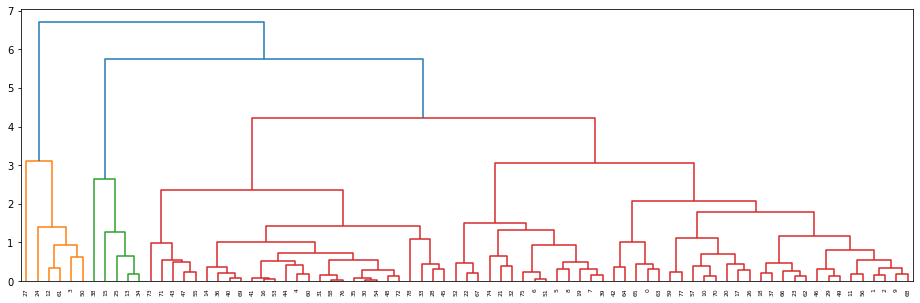

In [99]:
mergings = linkage(df_cricket_scaled, method="complete", metric='euclidean')
plt.figure(figsize=(16,5))
dendrogram(mergings)
plt.show()

In [100]:
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 3, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 0, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 3, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2])

In [101]:
df_cricket_['cluster_id'] = cluster_labels
df_cricket_.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id,Name
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,0,SR Tendulkar
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,0,KC Sangakkara
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,0,RT Ponting
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1,ST Jayasuriya
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2,DPMD Jayawardene


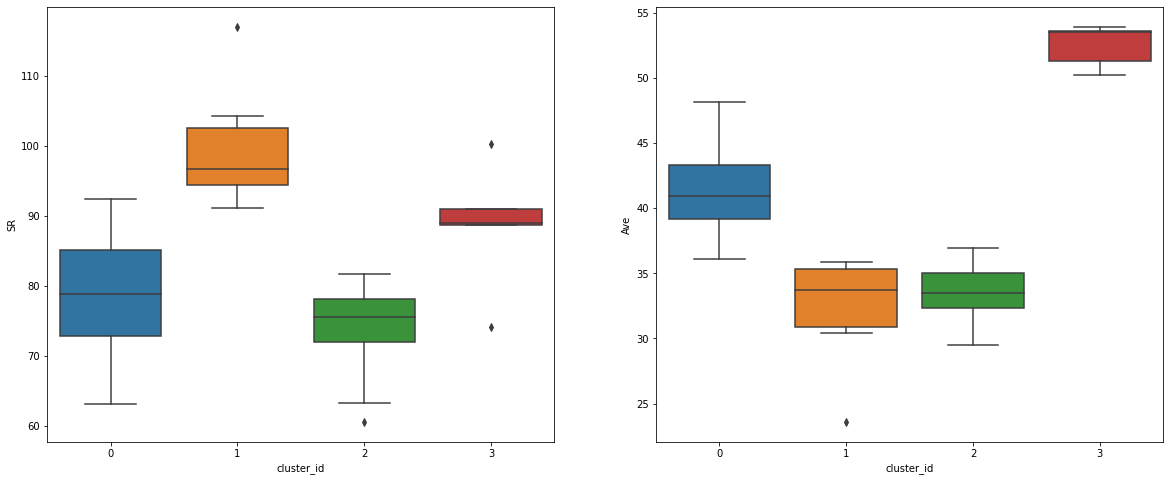

In [103]:
plt.figure(figsize=(20, 8))

ax = plt.subplot(1,2,1)
sns.boxplot(x='cluster_id', y='SR', data=df_cricket_, ax=ax)

ax = plt.subplot(1,2,2)
sns.boxplot(x='cluster_id', y='Ave', data=df_cricket_, ax=ax)

plt.show()

In [104]:
df_cricket_[df_cricket_['Name']=='V Kohli']['cluster_id'].values[0]

3

<AxesSubplot:xlabel='SR', ylabel='Ave'>

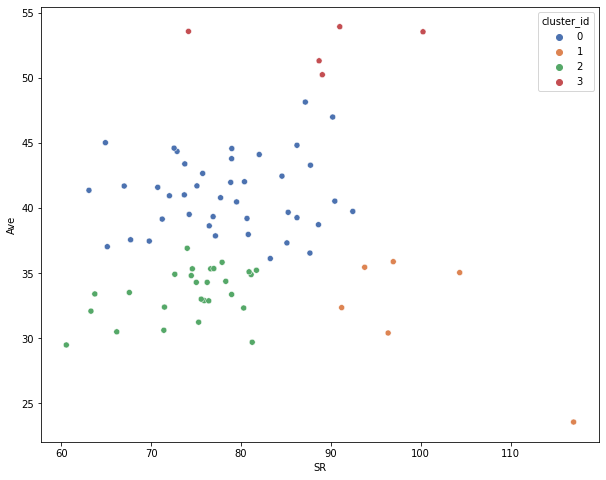

In [105]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='SR', y='Ave', data=df_cricket_,hue='cluster_id', palette='deep')

In [118]:
print(f"Group: 1")
print(df_cricket_[df_cricket_['cluster_id']==0][['Player','Name','cluster_id']])

Group: 1
                         Player             Name  cluster_id
0          SR Tendulkar (INDIA)     SR Tendulkar           0
1   KC Sangakkara (Asia/ICC/SL)    KC Sangakkara           0
2          RT Ponting (AUS/ICC)       RT Ponting           0
5     Inzamam-ul-Haq (Asia/PAK)   Inzamam-ul-Haq           0
6        JH Kallis (Afr/ICC/SA)        JH Kallis           0
7       SC Ganguly (Asia/INDIA)       SC Ganguly           0
8     R Dravid (Asia/ICC/INDIA)         R Dravid           0
9              BC Lara (ICC/WI)          BC Lara           0
10              TM Dilshan (SL)       TM Dilshan           0
11   Mohammad Yousuf (Asia/PAK)  Mohammad Yousuf           0
17            CH Gayle (ICC/WI)         CH Gayle           0
18            Saeed Anwar (PAK)      Saeed Anwar           0
19           S Chanderpaul (WI)    S Chanderpaul           0
20    Yuvraj Singh (Asia/INDIA)     Yuvraj Singh           0
21               DL Haynes (WI)        DL Haynes           0
22             

In [115]:
print(f"Group: 1")
print(df_cricket_[df_cricket_['cluster_id']==1][['Player','Name']])

Group: 1
                          Player           Name
3        ST Jayasuriya (Asia/SL)  ST Jayasuriya
12        AC Gilchrist (AUS/ICC)   AC Gilchrist
24     V Sehwag (Asia/ICC/INDIA)       V Sehwag
27  Shahid Afridi (Asia/ICC/PAK)  Shahid Afridi
50              BB McCullum (NZ)    BB McCullum
61              SK Raina (INDIA)       SK Raina


In [116]:
print(f"Group: 2")
print(df_cricket_[df_cricket_['cluster_id']==2][['Player','Name']])

Group: 2
                        Player              Name
4   DPMD Jayawardene (Asia/SL)  DPMD Jayawardene
14        M Azharuddin (INDIA)      M Azharuddin
16            PA de Silva (SL)       PA de Silva
28         SP Fleming (ICC/NZ)        SP Fleming
30              SR Waugh (AUS)          SR Waugh
31            A Ranatunga (SL)       A Ranatunga
33           Younis Khan (PAK)       Younis Khan
35          Saleem Malik (PAK)      Saleem Malik
36               NJ Astle (NZ)          NJ Astle
40              A Flower (ZIM)          A Flower
41          Shoaib Malik (PAK)      Shoaib Malik
43             GW Flower (ZIM)         GW Flower
44            Ijaz Ahmed (PAK)        Ijaz Ahmed
45             AR Border (AUS)         AR Border
47          RB Richardson (WI)     RB Richardson
48       WU Tharanga (Asia/SL)       WU Tharanga
53              JN Rhodes (SA)         JN Rhodes
54       Mohammad Hafeez (PAK)   Mohammad Hafeez
55           Rameez Raja (PAK)       Rameez Raja
58         

In [117]:
print(f"Group: 1")
print(df_cricket_[df_cricket_['cluster_id']==3][['Player','Name']])

Group: 1
                     Player            Name
13    MS Dhoni (Asia/INDIA)        MS Dhoni
15  AB de Villiers (Afr/SA)  AB de Villiers
25          V Kohli (INDIA)         V Kohli
34             HM Amla (SA)         HM Amla
38           MG Bevan (AUS)        MG Bevan
